In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import os


# Description du projet

Capteur d'humidité du sol

In [2]:
os.system('scp pi@192.168.1.204:/home/pi/E2_watering/report/soil_moisture.csv  /home/iomys/Programmation/E2_watering/report/soil_moisture.csv')

0

In [3]:
df = pd.read_csv('soil_moisture.csv', parse_dates=True,index_col='timestamp',sep='\s*,\s*',engine='python')
df

,chinois,cap1,cap2,soil temperature,temperature,humidity,cap0
timestamp,,,,,,,
2021-05-18 22:13:03.930138,719.0,855,381,11.6875,NaN,NaN,NaN
2021-05-18 22:14:03.311809,726.0,836,383,11.6875,NaN,NaN,NaN
2021-05-18 22:15:03.686890,722.0,832,383,11.6875,NaN,NaN,NaN
2021-05-18 22:16:03.989089,734.0,837,383,11.6875,NaN,NaN,NaN
2021-05-18 22:17:03.348559,738.0,857,383,11.6875,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-06-01 07:14:03.750061,NaN,312,381,13.4375,14.826775,32.0,576.0
2021-06-01 07:15:04.282314,NaN,313,380,13.4375,14.838028,32.0,578.0
2021-06-01 07:16:03.837328,NaN,313,381,13.4375,14.848900,32.0,578.0


In [4]:

#df2["2021-05-12":"2021-05-18"]

<AxesSubplot:xlabel='timestamp'>

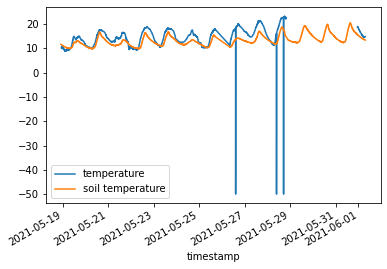

In [5]:
df[df.index >"2021-05-18 18:00"][["temperature", "soil temperature"]].plot()

df2

## Données intéressantes

L'arrosage a été lancé à env. 13h10, le 28 mai 2021. Il faisait beau depuis quelques jours et normalement,
les capteurs devraient afficher un changement. Il s'est arrêté on ne sait pas quand mais a été redémarré à 17h44
Arret à 19h03.








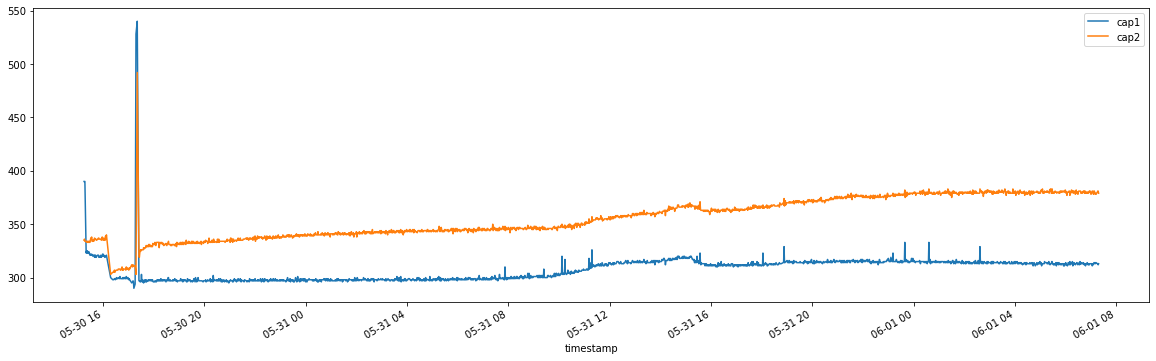

In [8]:
df3 = df[["cap1", "cap2", "chinois", "cap0"]]
df3 = df3[df3['cap0']<=1024]
df3 = df3[df3['cap1']<=1024]
df3 = df3[df3['cap2']<=1024]
#df3 = df3[df3['chinois']<=1024]
#df3 = df3[df3.index >"2021-05-30 13:00"][["cap1", "cap2", "cap0", "chinois"]]
#df3 = df3[df3.index <"2021-05-22 06:00"][["cap1", "cap2", "cap0", "chinois"]]


#chinois
#df3 = df3[((df3.chinois.shift() - df3.chinois)<50)] #Supression des sauts négatifs
#df3 = df3[((df3.chinois - df3.chinois.shift())<50)] #Supression des sauts positifs

#cap0
df3 = df3[((df3.cap0.shift() - df3.cap0)<20)] #Supression des sauts négatifs
df3 = df3[((df3.cap0 - df3.cap0.shift())<20)] #Supression des sauts positifs

#cap1
df3 = df3[((df3.cap1.shift() - df3.cap1)<20)] #Supression des sauts négatifs
df3 = df3[((df3.cap1 - df3.cap1.shift())<20)] #Supression des sauts positifs
#
# #cap2
df3 = df3[((df3.cap2.shift() - df3.cap2)<20)] #Supression des sauts négatifs
df3 = df3[((df3.cap2 - df3.cap2.shift())<20)] #Supression des sauts positifs

#Moving Average
df3 = df3.rolling(60).mean()

#Création du plot

df3[["cap1", "cap2"]].plot(figsize=(20, 6))
#ax1 = ax.twinx()
#df3["cap2"].plot(ax=ax1, color="red")
plt.savefig("/home/iomys/Programmation/E2_watering/fig/moisture.svg")

<AxesSubplot:xlabel='timestamp'>

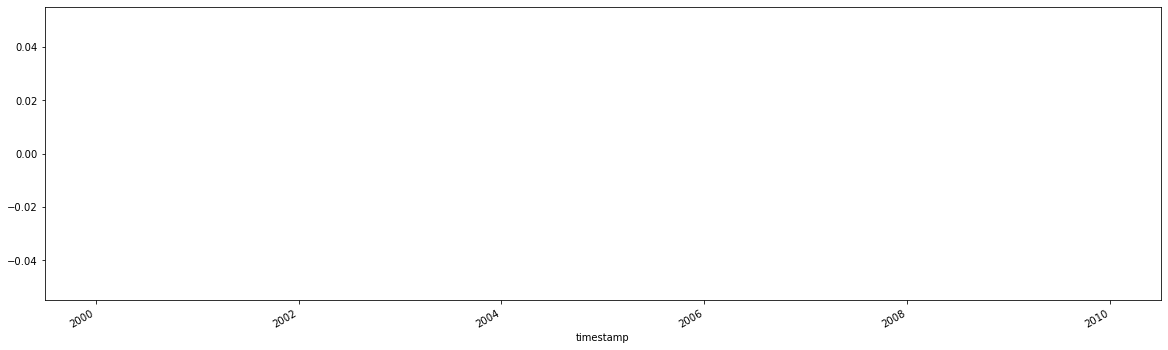

In [7]:
df3.chinois.plot(figsize=(20, 6))

## Cap

|  | cap 1 | cap 2 |
| - | - | - |
| **air** | 550 | 485 |
| **eau** | 295 | 292 |
| **sol détrempé** | 295 | 315 |

